In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
homes = pd.read_csv("data/homes.csv")
homes.head()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In [3]:
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sell       50 non-null     int64  
 1    "List"    50 non-null     int64  
 2    "Living"  50 non-null     int64  
 3    "Rooms"   50 non-null     int64  
 4    "Beds"    50 non-null     int64  
 5    "Baths"   50 non-null     int64  
 6    "Age"     50 non-null     int64  
 7    "Acres"   50 non-null     float64
 8    "Taxes"   50 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.6 KB


In [4]:
homes.describe()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


The dataset contains 9 variables. All of the columns are numerical columns. 

The describe() function returned the basic statistical information about the columns including count of values, mean, standard deviation, minimum value, value of the 25% percentile, value of the 50% percentile, value of the 75% percentile, and the maximum value.

From the output, we can learn that the range of values vary across all columns from 0.22 to 12192. It is also worth mentioning that the columns "Beds" and "Baths" both have abnormal values; the minimum value equals to the 25% percentile, and the 50% equals to the 75% percentile.

In [5]:
homes.corr()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
Sell,1.000000,0.997433,0.879381,0.560425,0.335113,0.640059,-0.147343,0.168713,0.899339
"""List""",0.997433,1.000000,0.891618,0.570704,0.320470,0.640295,-0.130325,0.166838,0.906636
"""Living""",0.879381,0.891618,1.000000,0.750933,0.467277,0.668437,0.125075,0.177488,0.810243
"""Rooms""",0.560425,0.570704,0.750933,1.000000,0.656557,0.555187,0.371237,0.282448,0.516593
"""Beds""",0.335113,0.320470,0.467277,0.656557,1.000000,0.458682,0.141205,0.036832,0.313638
"""Baths""",0.640059,0.640295,0.668437,0.555187,0.458682,1.000000,-0.023063,0.301119,0.582622
"""Age""",-0.147343,-0.130325,0.125075,0.371237,0.141205,-0.023063,1.000000,0.303733,-0.189221
"""Acres""",0.168713,0.166838,0.177488,0.282448,0.036832,0.301119,0.303733,1.000000,0.059647
"""Taxes""",0.899339,0.906636,0.810243,0.516593,0.313638,0.582622,-0.189221,0.059647,1.000000


Use this method to check the correlation among each columns, so that we can have a better understanding of the correlation between different pairs of columns. We can then conduct more in-depth correlation analysis. 

Based on the result, the following pair of columns have the strongest correlations (larger than 0.75):
1. Sell & List
2. Sell & living
3. Sell & Taxes
4. List & Living
5. List & Taxes
6. Living & Rooms
7. Living & Taxes

{'whiskers': [<matplotlib.lines.Line2D at 0x2063e8e75d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2063e97cd10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2063e96e590>,
 'medians': [<matplotlib.lines.Line2D at 0x2063e97e490>,
 'fliers': [<matplotlib.lines.Line2D at 0x2063e97ef90>,
 'means': []}

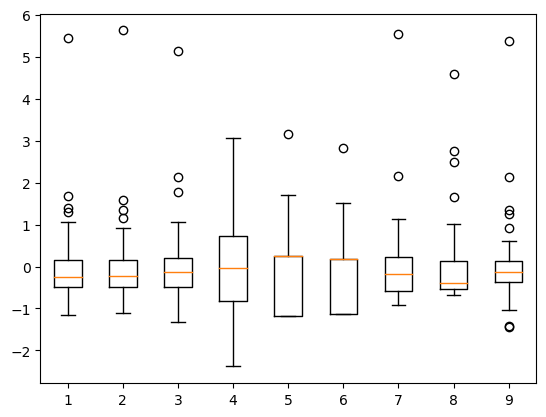

In [6]:
homes_std = (homes-homes.mean())/homes.std()
plt.boxplot(homes_std)

In this step, I created a boxplot of all columns. 

Since the columns "taxes" has much larger numbers than other columns, I standardized all columns and used the standardized values to generate the boxplot, so that it helps with scaling and also centralized the data for better visualization.

With boxplots, we have the visual summarization of the variance and outliers of each column. We can also compare the characteristics of columns in the boxplot.

The boxplots generated provides many valuable insights:
1. Columns "sell", "list","living", "age", "acres", "taxes" have many outliers
2. the majority of outliers are values larger than the interquantile ranges
3. The column "rooms" has a much larger interquantile range
4. The columns "Beds" and "Baths" have a strange interquantile range where their minimum scores equal to their 25% score and their 50% score equals to their 75% score. 
5. Columns "Sell", "List", "Living", "Rooms", and "Taxes" are approximately symmetric, but the columns "Age" and "Acres" are right-skewed/positively skewed. 

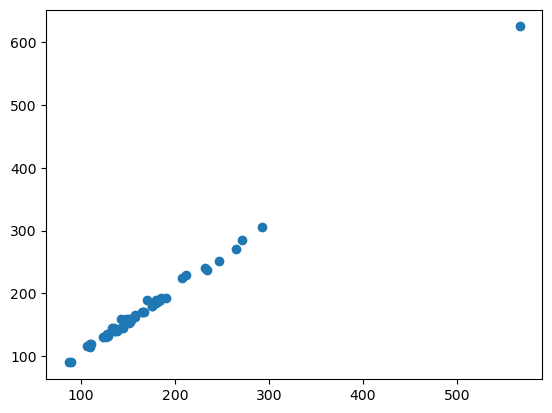

In [7]:
plt.scatter(homes['Sell'],homes[' "List"'])

In this step, I created a scatterplot of the columns "Sell" and "List". With the scatterplot, we can visually understand the correlation between the two columns. 

Based on the scatterplot, I learn that there is very strong positive relationship between the "Sell" and "List" columns.

In [8]:
y = homes['Sell']
x = homes[' "Taxes"']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           7.22e-19
Time:                        15:43:57   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.155      -6.635      40.378
 "Taxes"       0.0414      0.003     14.250      0.000       0.036       0.047
==============================================================================
Omnibus:                       28.767   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.574
Skew:                           1.690   Prob(JB):                     1.16e-13
Kurtosis:                       7.144   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared is a number that measures how well a statistical model predicts an outcome. R-squared is 0.809 means that approximately 80.9% of the variance in the selling prices can be explained by taxes.
The coefficient for "Taxes" is 0.0414 and its standard error is 0.003. Its p-value is also very low (0.000), indicating that "Taxes" is a statistically significant predictor of selling price.
Thus, based on the output, we can learn that taxes is a good predictor for selling price.

In [9]:
x2 = homes[' "Age"']
x2 = sm.add_constant(x2)
model2 = sm.OLS(y,x2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.065
Date:                Wed, 21 Feb 2024   Prob (F-statistic):              0.307
Time:                        15:43:57   Log-Likelihood:                -284.25
No. Observations:                  50   AIC:                             572.5
Df Residuals:                      48   BIC:                             576.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        180.8230     14.440     12.523      0.000     151.790     209.856
 "Age"        -0.3462      0.335     -1.032      0.307      -1.021       0.328
==============================================================================
Omnibus:                       65.016   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              564.646
Skew:                           3.358   Prob(JB):                    2.45e-123
Kurtosis:                      18.031   Cond. No.                         60.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared of this model is 0.022 means that approximately only 2.2% of the variance in the selling prices can be explained by the age.
The coefficient for "Age" is -0.3462 and the standard error of 0.335. However, its p-value is 0.307 which means that it is not statistically significant. 

Thus, the first model with taxes as the independent variable is better. However, these two models are both limited to only one independent variable. According to the correlation I examed before, there are other variables that might be correlated to "Sell" too. It is better to develop a model that includes more correlated vairables. 